In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [ ]:
# Load and preprocess the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(f"{train_images.shape=}\n{train_labels.shape=}\n{test_images.shape=}\n{test_labels.shape=}")

train_images.shape=(60000, 28, 28)
train_labels.shape=(60000,)
test_images.shape=(10000, 28, 28)
test_labels.shape=(10000,)


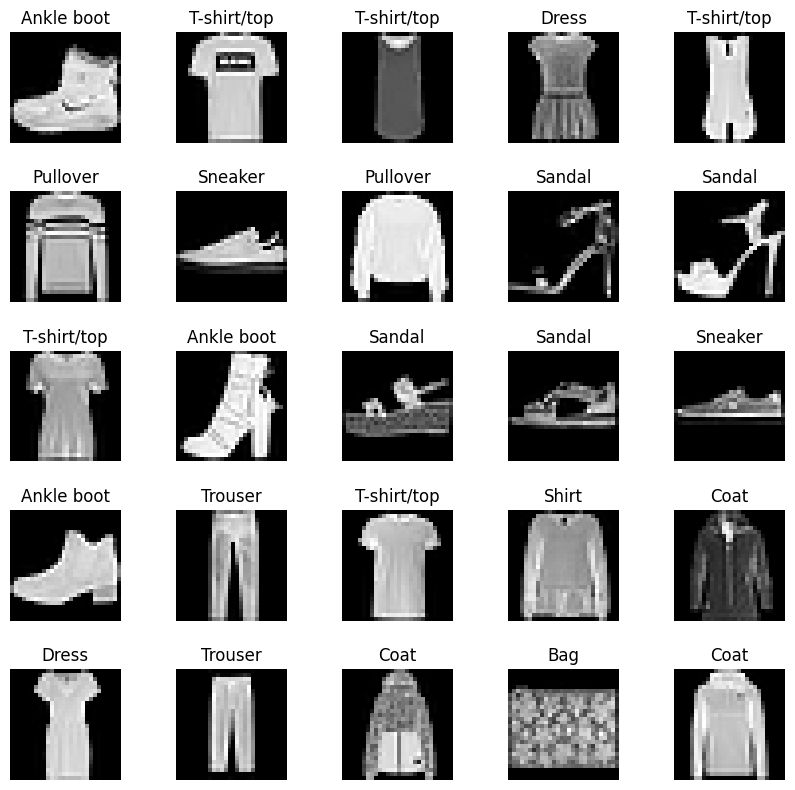

In [ ]:
# Define class labels for reference
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Function to plot images
def plot_images(images, labels, nrows, ncols):
    fig, axes = plt.subplots(nrows, ncols, figsize=(10, 10))
    axes = axes.ravel()

    for i in np.arange(0, nrows * ncols):
        axes[i].imshow(images[i], cmap='gray')
        axes[i].set_title(class_labels[labels[i]])
        axes[i].axis('off')

    plt.subplots_adjust(wspace=0.5)

# Specify the number of rows and columns for the grid
nrows = 5
ncols = 5

# Plot a sample of images
plot_images(train_images, train_labels, nrows, ncols)

# Show the plot

In [ ]:
# normalize
train_images = train_images.reshape((60000, 28, 28)).astype('float32') / 255
test_images = test_images.reshape((10000, 28, 28)).astype('float32') / 255

In [ ]:
# Build the neural network model with explicit ReLU layers
model = models.Sequential()

model.add(layers.Flatten(input_shape=(28, 28)))
model.add(layers.Dense(16))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(32))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(16))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(10))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 16)                12560     
                                                                 
 batch_normalization (Batch  (None, 16)                64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 16)                0         
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                544       
                                                        

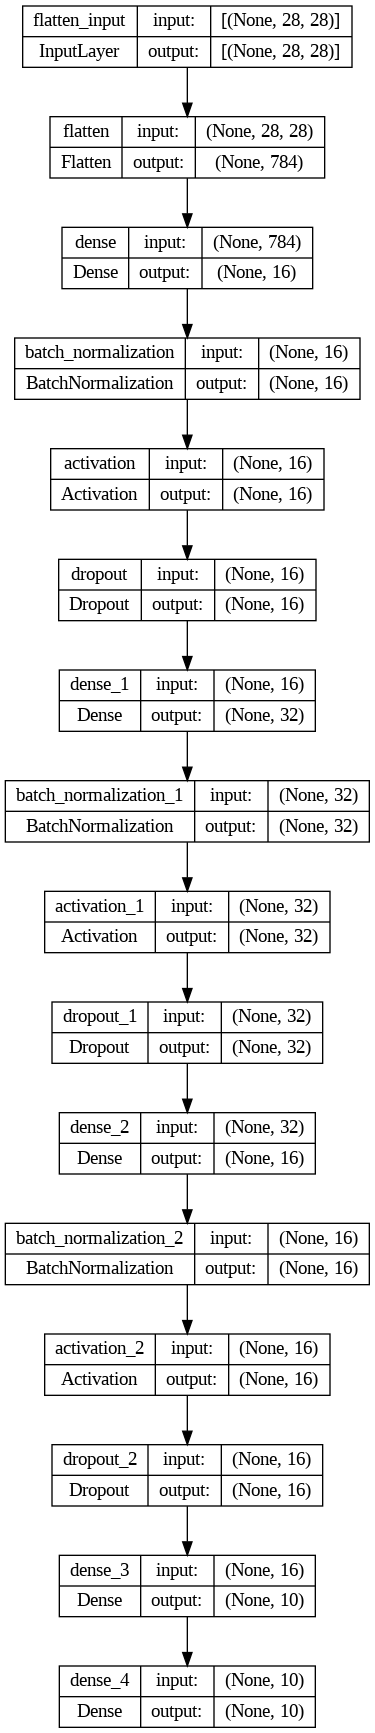

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# Train the model
history = model.fit(
    train_images, train_labels, epochs=5,
    batch_size=64, validation_split=0.2
)

Epoch 1/5
750/750 [==============================] - 15s 6ms/step - loss: 1.1632 - accuracy: 0.5863 - val_loss: 0.6076 - val_accuracy: 0.7527
Epoch 2/5
750/750 [==============================] - 4s 6ms/step - loss: 0.8184 - accuracy: 0.7003 - val_loss: 0.5436 - val_accuracy: 0.8000
Epoch 3/5
750/750 [==============================] - 5s 6ms/step - loss: 0.7535 - accuracy: 0.7314 - val_loss: 0.5246 - val_accuracy: 0.8163
Epoch 4/5
750/750 [==============================] - 4s 5ms/step - loss: 0.7159 - accuracy: 0.7490 - val_loss: 0.4961 - val_accuracy: 0.8288
Epoch 5/5
750/750 [==============================] - 4s 5ms/step - loss: 0.6964 - accuracy: 0.7599 - val_loss: 0.4717 - val_accuracy: 0.8410


In [ ]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}\nTest Loss: {test_loss:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.4961 - accuracy: 0.8318
Test accuracy: 0.8318
Test Loss: 0.4961


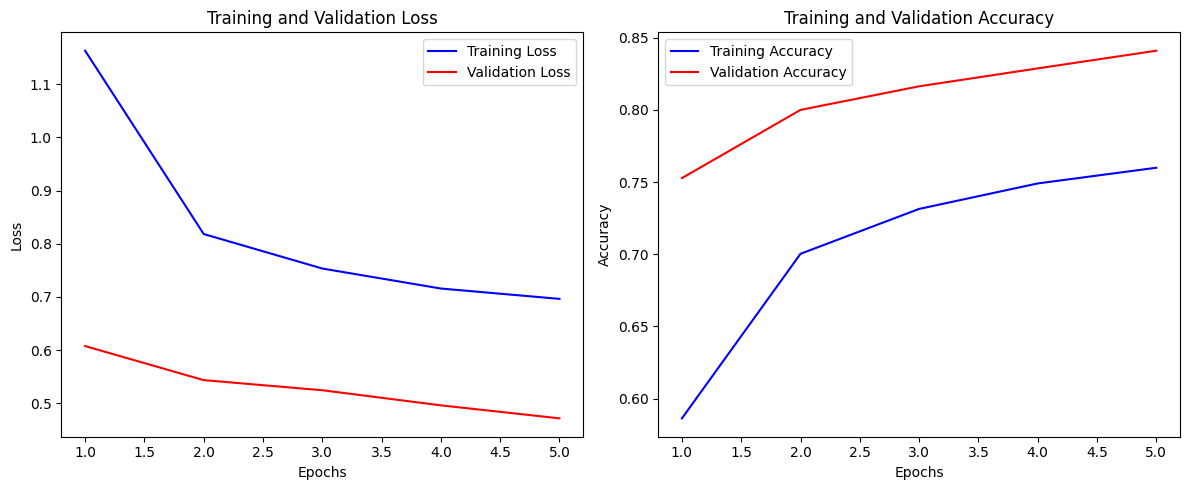

In [ ]:
# Plotting the training loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

# Loss plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

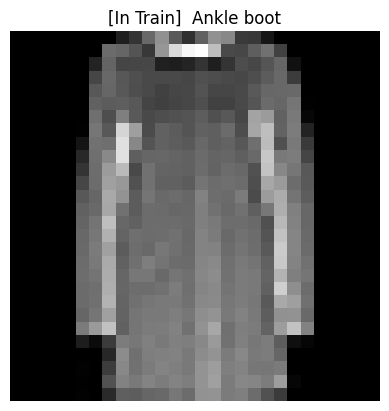

In [ ]:
image_index = 150

# Plot the selected image
plt.imshow(train_images[image_index], cmap='gray')

plt.imshow(test_images[image_index], cmap='gray')
plt.title("[In Train]  " + class_labels[train_labels[image_index]])
plt.axis('off')
plt.show()

In [ ]:
input_image = train_images[image_index]
input_image = input_image.reshape((1, 28, 28, 1))  # Reshape for model input

predictions = model.predict(input_image)

predicted_class = np.argmax(predictions)

1/1 [==============================] - 0s 17ms/step


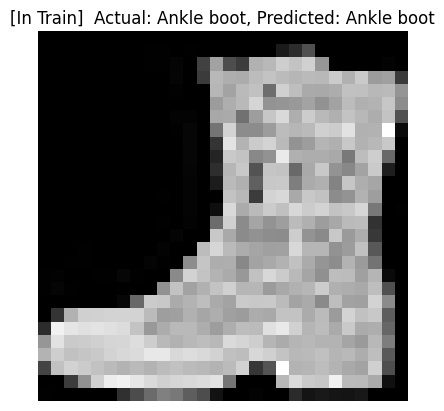

In [ ]:
# Define class labels for reference
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Display the input image
plt.imshow(train_images[image_index], cmap='gray')
plt.title(f'[In Train]  Actual: {class_labels[train_labels[image_index]]}, Predicted: {class_labels[predicted_class]}')
plt.axis('off')
plt.show()

In [ ]:
test_predictions = np.argmax(model.predict(test_images), axis=-1)

print(classification_report(test_labels, test_predictions))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

           0       0.82      0.75      0.79      1000
           1       0.99      0.95      0.97      1000
           2       0.72      0.70      0.71      1000
           3       0.81      0.88      0.85      1000
           4       0.74      0.73      0.73      1000
           5       0.94      0.90      0.92      1000
           6       0.55      0.60      0.57      1000
           7       0.89      0.94      0.91      1000
           8       0.96      0.94      0.95      1000
           9       0.93      0.92      0.93      1000

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000

